### PROYECTO FINAL ###

### ANALISIS EXPLORATORIO EDA ###

Comenzamos importando las librerias necesarias para cada avance

In [2]:
#Carga de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gps

##### VENTAS FINALES 2016 #####

In [3]:
archivo = pd.read_csv('SalesFINAL12312016.csv', sep=',')

In [4]:
archivo.head() #Visualiza los primeros datos para tener nocion de la estructura de los datos

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [5]:
archivo.shape # Verificamos que la cantidad de registros coincidan con los especificado

(1048575, 14)

In [6]:
archivo.isnull().sum() [archivo.isnull().sum()>500000]

Series([], dtype: int64)

In [7]:
duplicated_records = archivo[archivo.duplicated()]

In [8]:
print("Registros duplicados:")
print(duplicated_records)

Registros duplicados:
Empty DataFrame
Columns: [InventoryId, Store, Brand, Description, Size, SalesQuantity, SalesDollars, SalesPrice, SalesDate, Volume, Classification, ExciseTax, VendorNo, VendorName]
Index: []


In [9]:
# Contar el número de registros duplicados
duplicated_records_count = len(duplicated_records)
print(f"Número de registros duplicados: {duplicated_records_count}")

Número de registros duplicados: 0


In [10]:
# Eliminar columnas menos relevantes
columns_to_drop = [ 'Classification', 'ExciseTax', 'Volume']
archivo_reduced = archivo.drop(columns=columns_to_drop)




In [11]:
# Verificar el nuevo dataset
archivo_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   InventoryId    1048575 non-null  object 
 1   Store          1048575 non-null  int64  
 2   Brand          1048575 non-null  int64  
 3   Description    1048575 non-null  object 
 4   Size           1048575 non-null  object 
 5   SalesQuantity  1048575 non-null  int64  
 6   SalesDollars   1048575 non-null  float64
 7   SalesPrice     1048575 non-null  float64
 8   SalesDate      1048575 non-null  object 
 9   VendorNo       1048575 non-null  int64  
 10  VendorName     1048575 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 88.0+ MB


In [12]:
print(archivo_reduced.isnull().sum() [archivo_reduced.isnull().sum()>0])
print(np.shape(archivo_reduced))

Series([], dtype: int64)
(1048575, 11)


In [14]:
#Pasar del tipo de dato de la columna "date" a tipo de dato "datetime"
archivo_reduced['SalesDate']=pd.to_datetime(archivo_reduced['SalesDate'])

print(archivo_reduced['SalesDate'].dtype)

datetime64[ns]


In [15]:
start_date='2016-01-01'
end_date='2016-12-31'

In [17]:
archivo_reduced_fecha = archivo_reduced[(archivo_reduced['SalesDate']>= start_date) & (archivo_reduced['SalesDate']<=end_date)]
archivo_reduced_fecha.shape


(1048575, 11)

In [23]:
archivo_reduced_fecha.rename(columns={'Brand':'InventoryId1'},inplace=True)
archivo_reduced_fecha.rename(columns={'InventoryId':'Brand1'},inplace=True)

In [24]:
archivo_reduced_fecha.head() #Visualiza los primeros datos para tener nocion de la estructura de los datos

,Brand1,Store,InventoryId1,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,12546,JIM BEAM BRANDS COMPANY


In [25]:
#Guardamos el dataset final con las filtraciones requeridas y limpio
archivo_reduced_fecha.to_csv('VentasFinales2016.csv',index=False)

In [27]:
#Cargamos el archivo filtrado para continuar con el analisis
Ventas_2016=pd.read_csv('VentasFinales2016.csv', sep=',')

<Axes: title={'center': 'Cantidad de ventas a lo largo del tiempo'}, xlabel='SalesDate'>

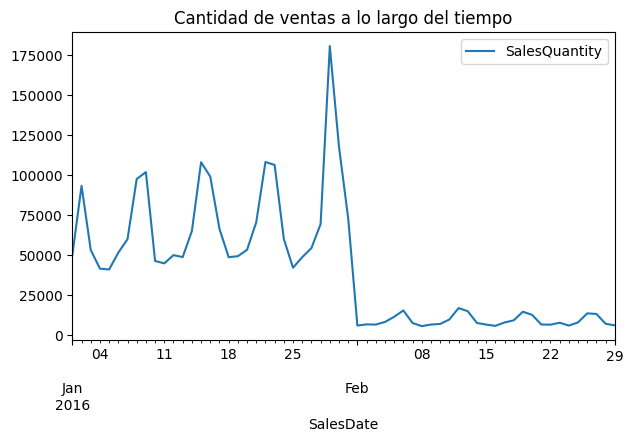

In [90]:
Ventas_2016['SalesDate'] = pd.to_datetime(Ventas_2016['SalesDate'])
sales_quantity_trend = Ventas_2016.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(7, 4), title='Cantidad de ventas a lo largo del tiempo')

Es un gráfico de líneas que representa la tendencia de la cantidad de ventas a lo largo del tiempo. 

<Axes: title={'center': 'Precio promedio venta a lo largo del tiempo'}, xlabel='SalesDate'>

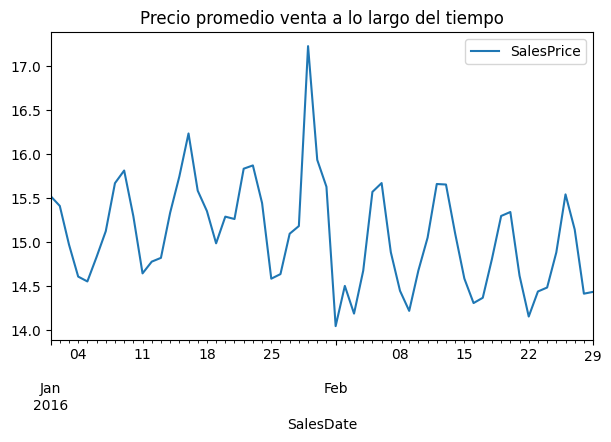

In [91]:
avg_price_trend = Ventas_2016.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(7, 4), title='Precio promedio venta a lo largo del tiempo')

Si el precio promedio de venta muestra una tendencia ascendente, podría indicar una mayor disposición de los clientes a pagar más por los productos, posiblemente debido a mejoras en la calidad, cambios en el posicionamiento del mercado, o inflación. Si la tendencia es descendente, podría sugerir que se están vendiendo productos más baratos o que hay una presión para reducir precios debido a la competencia.

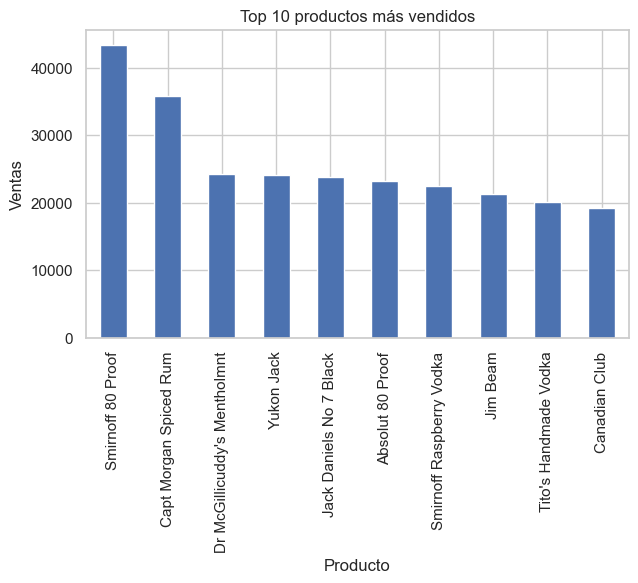

In [28]:
# Distribución de ventas por producto
top_products = Ventas_2016.groupby('Description')['SalesQuantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,4))
top_products.plot(kind='bar')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

Producto 1 es claramente el producto más popular, seguido de cerca por Producto 2 y Producto 3. Es importante asegurar que siempre haya suficiente inventario de estos productos.
Producto 10, aunque está en el top 10, tiene menos de la mitad de las ventas de Producto 1, lo que sugiere que hay una gran variación en la popularidad entre los productos más vendidos.
Si Producto 1, 2 y 3 pertenecen a la misma categoría, esta categoría es muy popular y podría beneficiarse de una mayor promoción o de la introducción de nuevos productos similares.
La diferencia entre Producto 1 y Producto 10 sugiere que podría ser beneficioso investigar qué hace que Producto A sea tan popular y aplicar esos insights a otros productos.

##### INVENTARIO INICIAL 2016 #####

In [27]:
archivo = pd.read_csv('BegInvFINAL12312016.csv', sep=',')

In [28]:
archivo.head() #Visualiza los primeros datos para tener nocion de la estructura de los datos


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [29]:
archivo.shape # Verificamos que la cantidad de registros coincidan con los especificado

(206529, 9)

In [31]:
archivo['startDate']=pd.to_datetime(archivo['startDate'])

print(archivo['startDate'].dtype)

datetime64[ns]


In [51]:
# Contar el número de registros duplicados
duplicated_records_count = len(duplicated_records)
print(f"Número de registros duplicados: {duplicated_records_count}")

Número de registros duplicados: 0


In [32]:
start_date='2016-01-01'
end_date='2016-12-31'

In [38]:
archivo_reduced_fecha = archivo[(archivo['startDate']>= start_date) & (archivo['startDate']<=end_date)]
archivo_reduced_fecha.shape

(206529, 9)

In [39]:
archivo_reduced_fecha.rename(columns={'Brand':'InventoryId1'},inplace=True)
archivo_reduced_fecha.rename(columns={'InventoryId':'Brand1'},inplace=True)

In [40]:
archivo_reduced_fecha.head()

,Brand1,Store,City,InventoryId1,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [41]:

# Mostrar los tipos de datos originales
print("Tipos de datos originales:")
print(archivo_reduced_fecha.dtypes)

# Identificar y eliminar registros duplicados
print(f"\nTotal de registros antes de eliminar duplicados: {len(archivo_reduced_fecha)}")
archivo_reduced_fecha = archivo_reduced_fecha.drop_duplicates()
print(f"Total de registros después de eliminar duplicados: {len(archivo_reduced_fecha)}")

# Identificar y eliminar registros con valores nulos
print(f"\nTotal de registros antes de eliminar valores nulos: {len(archivo_reduced_fecha)}")
archivo_reduced_fecha = archivo_reduced_fecha.dropna()
print(f"Total de registros después de eliminar valores nulos: {len(archivo_reduced_fecha)}")

# Identificar y eliminar registros con valores vacíos (strings vacíos)
print(f"\nTotal de registros antes de eliminar valores vacíos: {len(archivo_reduced_fecha)}")
archivo_reduced_fecha = archivo_reduced_fecha[~(archivo_reduced_fecha == '').any(axis=1)]
print(f"Total de registros después de eliminar valores vacíos: {len(archivo_reduced_fecha)}")

# Verificar tipos de datos después de la limpieza
print("\nTipos de datos después de la limpieza:")
print(archivo_reduced_fecha.dtypes)

# Guardar el dataset limpio
archivo_reduced_fecha.to_csv('ComienzoInv2016.csv', index=False)


Tipos de datos originales:
Brand1                  object
Store                    int64
City                    object
InventoryId1             int64
Description             object
Size                    object
onHand                   int64
Price                  float64
startDate       datetime64[ns]
dtype: object

Total de registros antes de eliminar duplicados: 206529


Total de registros después de eliminar duplicados: 206529

Total de registros antes de eliminar valores nulos: 206529
Total de registros después de eliminar valores nulos: 206529

Total de registros antes de eliminar valores vacíos: 206529
Total de registros después de eliminar valores vacíos: 206529

Tipos de datos después de la limpieza:
Brand1                  object
Store                    int64
City                    object
InventoryId1             int64
Description             object
Size                    object
onHand                   int64
Price                  float64
startDate       datetime64[ns]
dtype: object


In [4]:
#Cargamos el archivo filtrado para continuar con el analisis
Inv_Inicial=pd.read_csv('ComienzoInv2016.csv', sep=',')

In [95]:
beg_summary = Inv_Inicial.groupby(['InventoryId1', 'Description'])['onHand'].sum().sort_values(ascending=False)
top_5_beg = beg_summary.head(5)
bottom_5_beg = beg_summary.tail(5)

print("Top 5 de productos a principio de año:\n", top_5_beg)
print("\nProductos menos vendidos a principio de año:\n", bottom_5_beg)

Top 5 de productos a principio de año:
 InventoryId1  Description               
4261          Capt Morgan Spiced Rum        15499
8068          Absolut 80 Proof              15341
3876          Smirnoff 80 Proof             14829
3545          Ketel One Vodka               14499
6879          Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Productos menos vendidos a principio de año:
 InventoryId1  Description                 
42676         Kistler Chard Sonma Mountain    0
34693         Valley of the Moon Chard        0
42710         Pommery Pink Pop Rose           0
22647         Guillaume Vrignaud Chablis 1    0
21283         J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64


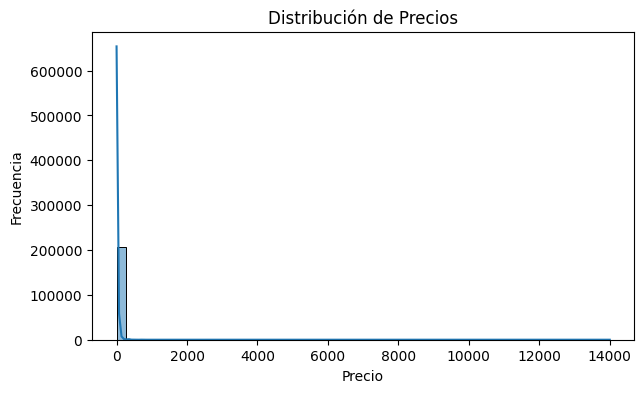

In [10]:
# Visualización de la distribución de precios
plt.figure(figsize=(7, 4))
sns.histplot(Inv_Inicial['Price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


 La mayoría de tus productos tienen precios bajos a moderados, pero hay algunos productos con precios mucho más altos.
Pico alrededor de 50: Esto puede indicar que 50 unidades monetarias es un precio común para muchos de tus productos.
Cola Larga: Podría haber productos premium o especializados que tienen precios mucho más altos que el promedio.

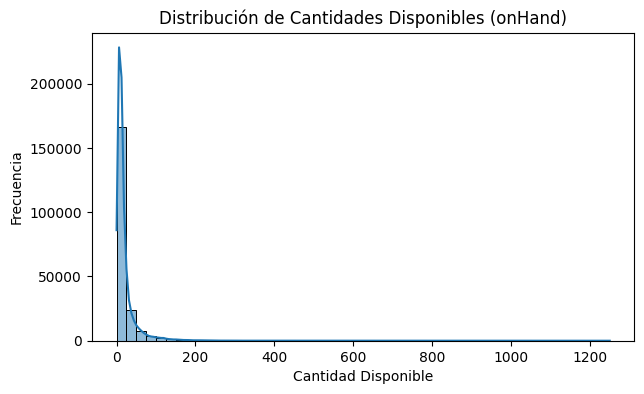

In [11]:
# Visualización de la distribución de onHand
plt.figure(figsize=(7, 4))
sns.histplot(Inv_Inicial['onHand'], bins=50, kde=True)
plt.title('Distribución de Cantidades Disponibles (onHand)')
plt.xlabel('Cantidad Disponible')
plt.ylabel('Frecuencia')
plt.show()


La mayoría de los productos tienen cantidades disponibles bajas a moderadas, pero hay algunos productos con cantidades mucho más altas.
Pico alrededor de 200000 unidades: Esto puede indicar que 200000 unidades es una cantidad común disponible para muchos de tus productos.
Cola Larga: Podría haber productos que están en exceso de inventario, lo que puede ser un signo de productos de baja rotación o sobrestock.

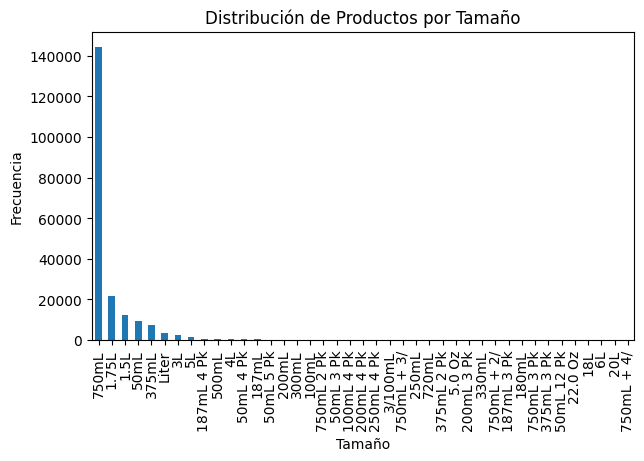

In [13]:
# Gráfico de barras para la distribución de productos por tamaño
plt.figure(figsize=(7, 4))
Inv_Inicial['Size'].value_counts().plot(kind='bar')
plt.title('Distribución de Productos por Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')
plt.show()


Tamaños más comunes (con mayor frecuencia): Si el tamaño "750mL" tiene la barra más alta, puede significar que este es el tamaño más popular y frecuente en tu inventario.
Tamaños menos comunes (con menor frecuencia): Si el tamaño "250mL" tiene una barra baja, puede indicar que es un tamaño menos popular y se produce en menor cantidad.
Variación en los tamaños: Si hay una gran variación en las alturas de las barras, puede ser necesario revisar las políticas de inventario para equilibrar mejor el stock de diferentes tamaños.

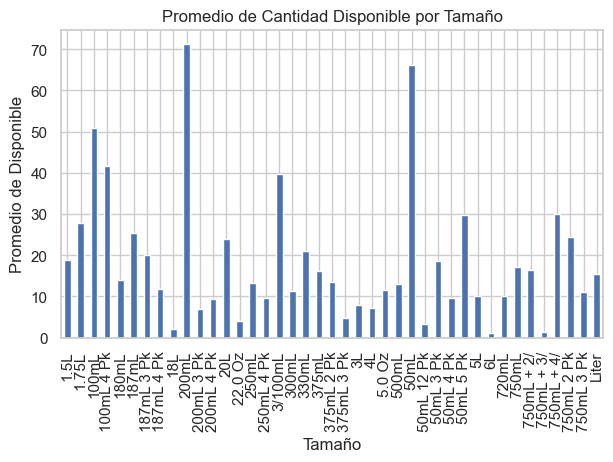

In [31]:
# Calcular el promedio de cantidad en mano por tamaño
average_onhand_by_size = Inv_Inicial.groupby('Size')['onHand'].mean()

# Graficar el promedio de cantidad en mano por tamaño
plt.figure(figsize=(7, 4))
average_onhand_by_size.plot(kind='bar')
plt.title('Promedio de Cantidad Disponible por Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Promedio de Disponible')
plt.show()


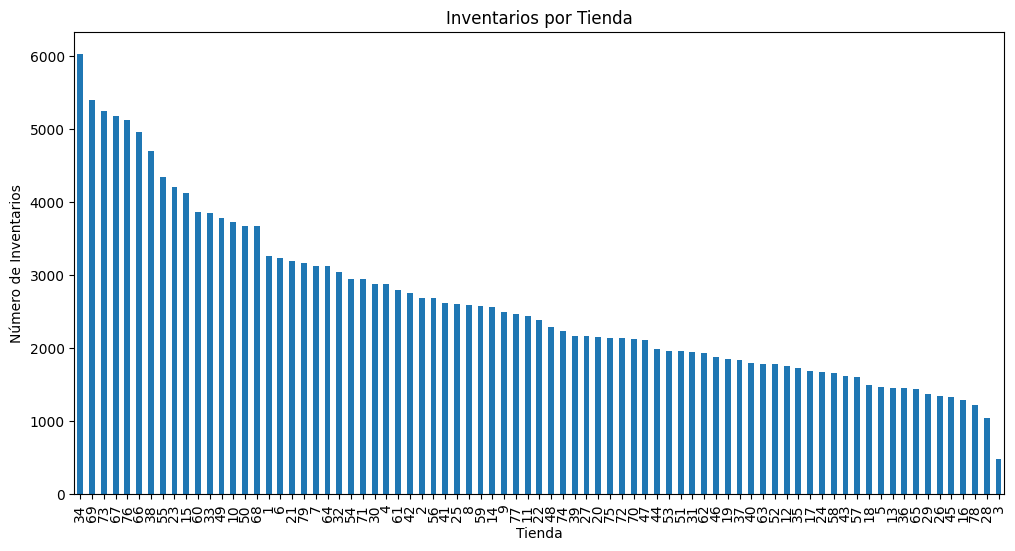

In [6]:
# Visualización de tiendas y sus inventarios
plt.figure(figsize=(12, 6))
store_inventory = Inv_Inicial.groupby('Store')['InventoryId1'].count().sort_values(ascending=False)
store_inventory.plot(kind='bar')
plt.title('Inventarios por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Número de Inventarios')
plt.show()


##### INVENTARIO FINAL 2016 #####

In [53]:
archivo = pd.read_csv('EndInvFINAL12312016.csv', sep=',')

In [54]:
# Mostrar las primeras filas del DataFrame
archivo.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [55]:
archivo.shape # Verificamos que la cantidad de registros coincidan con los especificado

(224489, 9)

In [56]:
# Verificar valores nulos
null_values = archivo.isnull().sum()

# Verificar filas duplicadas
duplicate_rows = archivo.duplicated().sum()




In [57]:
archivo.isnull().sum() [archivo.isnull().sum()>10000]

Series([], dtype: int64)

In [58]:
archivo.rename(columns={'Brand':'InventoryId1'},inplace=True)
archivo.rename(columns={'InventoryId':'Brand1'},inplace=True)

In [59]:
# Guardar el dataset limpio
archivo.to_csv('FinalInv2016.csv', index=False)

In [7]:
#Cargamos el archivo filtrado para continuar con el analisis
Inventario_Final=pd.read_csv('FinalInv2016.csv', sep=',')

In [99]:
end_summary = Inventario_Final.groupby(['InventoryId1', 'Description'])['onHand'].sum().sort_values(ascending=False)
top_5_end = end_summary.head(5)
bottom_5_end = end_summary.tail(5)
print("\nTop 5 mejores productos al final del año:\n", top_5_end)
print("\nLos 5 ultimos productos al final del año:\n", bottom_5_end)



Top 5 mejores productos al final del año:
 InventoryId1  Description            
3545          Ketel One Vodka            16770
4261          Capt Morgan Spiced Rum     16769
8111          Smirnoff 80 Proof          16242
8068          Absolut 80 Proof           15608
1233          Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Los 5 ultimos productos al final del año:
 InventoryId1  Description                
22183         Ninety+Cellars Lot 112 Svgn    0
19166         Stemmari Sangiovese            0
16472         Lock & Key Meritage            0
16531         Pazo de Galegos Albarino       0
20133         Fancy Pants Cab Svgn           0
Name: onHand, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\3036506089.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_inventory.index, y=city_inventory.values, palette="viridis")


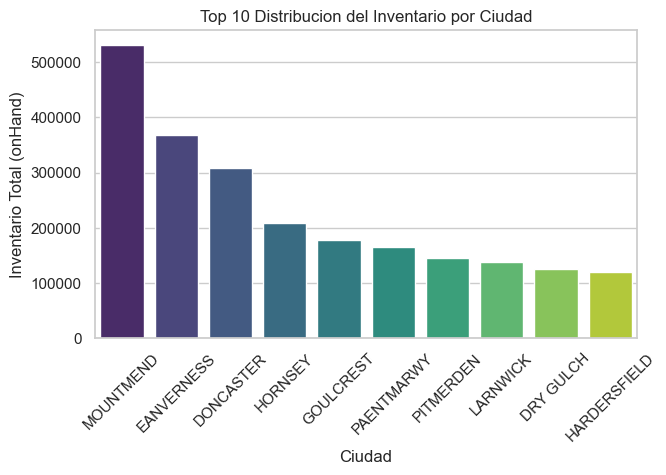

In [9]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un DataFrame con el inventario total por ciudad
city_inventory = Inventario_Final.groupby('City')['onHand'].sum().sort_values(ascending=False).head(10)

# Graficar el inventario total por ciudad
plt.figure(figsize=(7, 4))
sns.barplot(x=city_inventory.index, y=city_inventory.values, palette="viridis")
plt.title('Top 10 Distribucion del Inventario por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Inventario Total (onHand)')
plt.xticks(rotation=45)
plt.show()


Una ciudad con un inventario total significativamente más alto, lo que podría indicar su rol como un centro de distribución principal o su ubicación en una región con alta demanda. Variaciones considerables entre las ciudades en términos de inventario total, lo que sugiere diferencias en el mercado o en las operaciones logísticas.
Ciudades que podrían ser claves para la operación del negocio y podrían beneficiarse de un análisis más detallado para entender las razones detrás de su alto nivel de inventario.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\2934246568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_inventory.index, y=store_inventory.values, palette="viridis")


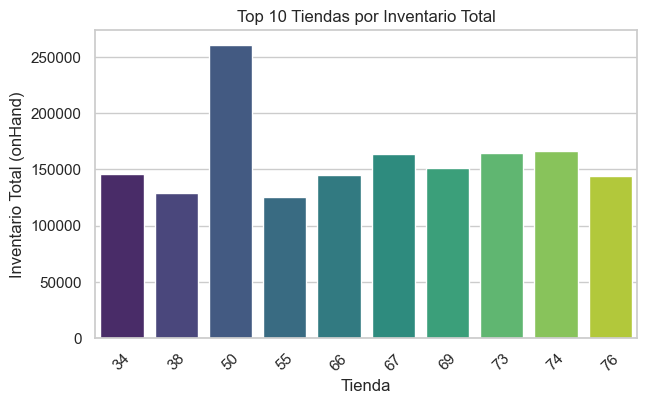

In [10]:
# Crear un DataFrame con el inventario total por tienda
store_inventory = Inventario_Final.groupby('Store')['onHand'].sum().sort_values(ascending=False).head(10)

# Graficar el inventario total por tienda
plt.figure(figsize=(7, 4))
sns.barplot(x=store_inventory.index, y=store_inventory.values, palette="viridis")
plt.title('Top 10 Tiendas por Inventario Total')
plt.xlabel('Tienda')
plt.ylabel('Inventario Total (onHand)')
plt.xticks(rotation=45)
plt.show()


Algunas tiendas tienen un inventario total significativamente más alto, lo que podría indicar su rol como centros de distribución o su ubicación en áreas de alta demanda.
La variación en los niveles de inventario podría sugerir diferencias en la gestión de inventarios, la capacidad de almacenamiento, o las ventas en esas tiendas.
La tienda con el inventario más alto podría ser una candidata para un análisis más detallado para entender las razones detrás de su alto nivel de inventario.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\304857852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.index, y=city_price.values, palette="magma")


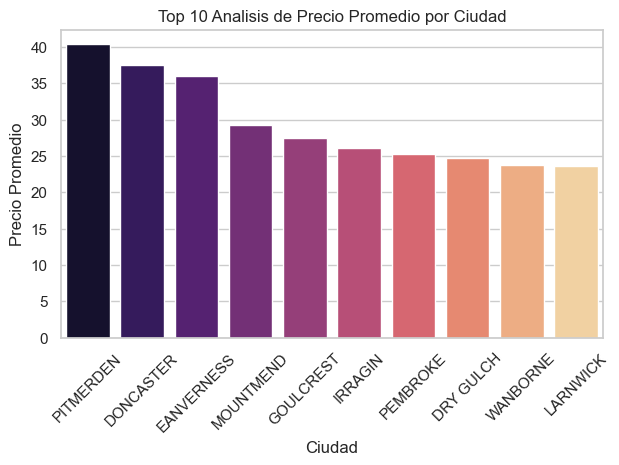

In [12]:
# Crear un DataFrame con el precio promedio por ciudad
city_price = Inventario_Final.groupby('City')['Price'].mean().sort_values(ascending=False).head(10)

# Graficar el precio promedio por ciudad
plt.figure(figsize=(7, 4))
sns.barplot(x=city_price.index, y=city_price.values, palette="magma")
plt.title('Top 10 Analisis de Precio Promedio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


Una ciudad con un precio promedio significativamente más alto, lo que podría indicar su rol como un mercado de lujo o su ubicación en una región con un alto poder adquisitivo. Variaciones considerables entre las ciudades en términos de precio promedio, lo que sugiere diferencias en el mercado o en las estrategias de precios.
Ciudades que podrían ser claves para la operación del negocio y podrían beneficiarse de un análisis más detallado para entender las razones detrás de su alto precio promedio.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\1566888069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_price.index, y=store_price.values, palette="magma")


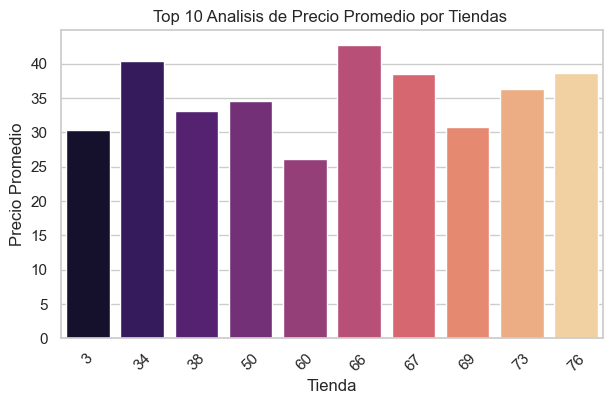

In [13]:
# Crear un DataFrame con el precio promedio por tienda
store_price =Inventario_Final.groupby('Store')['Price'].mean().sort_values(ascending=False).head(10)

# Graficar el precio promedio por tienda
plt.figure(figsize=(7, 4))
sns.barplot(x=store_price.index, y=store_price.values, palette="magma")
plt.title('Top 10 Analisis de Precio Promedio por Tiendas ')
plt.xlabel('Tienda')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


Algunas tiendas tienen un precio promedio significativamente más alto, lo que podría indicar su rol como mercados de lujo o su ubicación en áreas de alto poder adquisitivo.Variaciones considerables entre las tiendas en términos de precio promedio, sugiriendo diferencias en las estrategias de precios o en las características de los mercados locales.Las tiendas en el top 10 por precio promedio podrían ser objetivos clave para estrategias de marketing enfocadas en productos de alta gama.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\2931411978.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_products.values, y=common_products.index, palette="cividis")


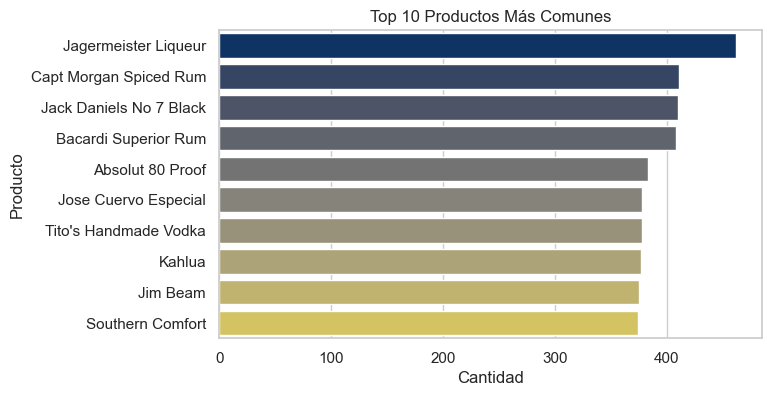

In [14]:
# Contar los productos más comunes
common_products = Inventario_Final['Description'].value_counts().head(10)

# Graficar los productos más comunes
plt.figure(figsize=(7, 4))
sns.barplot(x=common_products.values, y=common_products.index, palette="cividis")
plt.title('Top 10 Productos Más Comunes')
plt.xlabel('Cantidad')
plt.ylabel('Producto')
plt.show()


Algunos productos tienen cantidades significativamente más altas, lo que podría indicar su rol como productos esenciales o de alta demanda.
Variaciones considerables entre los productos en términos de cantidad, sugiriendo diferencias en las necesidades del mercado o en las preferencias de los clientes.
Los productos en el top 10 por cantidad podrían ser objetivos clave para estrategias de abastecimiento, marketing o promociones.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\2642673356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_expensive_products['Price'], y=most_expensive_products['Description'], palette="plasma")


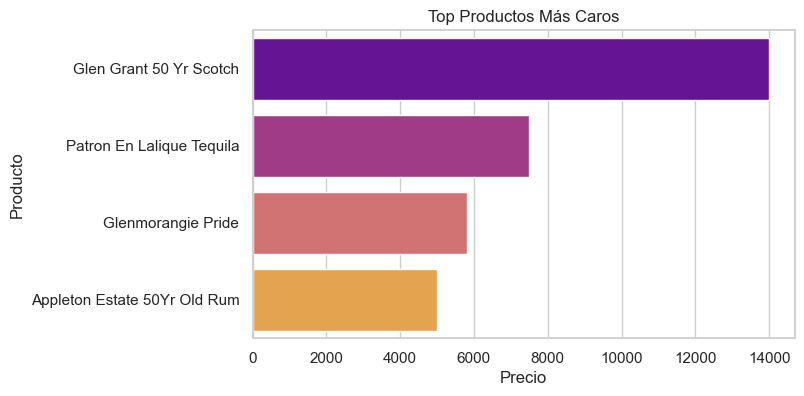

In [16]:
# Ordenar el DataFrame por precio de manera descendente y seleccionar los productos más caros
most_expensive_products = Inventario_Final[['Description', 'Price']].sort_values(by='Price', ascending=False).head(10)

# Graficar los productos más caros
plt.figure(figsize=(7, 4))
sns.barplot(x=most_expensive_products['Price'], y=most_expensive_products['Description'], palette="plasma")
plt.title('Top Productos Más Caros')
plt.xlabel('Precio')
plt.ylabel('Producto')
plt.show()


Algunos productos tienen precios significativamente más altos, lo que podría indicar su rol como productos de lujo o especializados.
Variaciones considerables entre los productos en términos de precio, sugiriendo diferencias en la exclusividad o la calidad de los productos.
Los productos en el top 10 por precio podrían ser objetivos clave para estrategias de marketing enfocadas en consumidores de alto poder adquisitivo.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\432167001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cheapest_products['Price'], y=cheapest_products['Description'], palette="plasma")


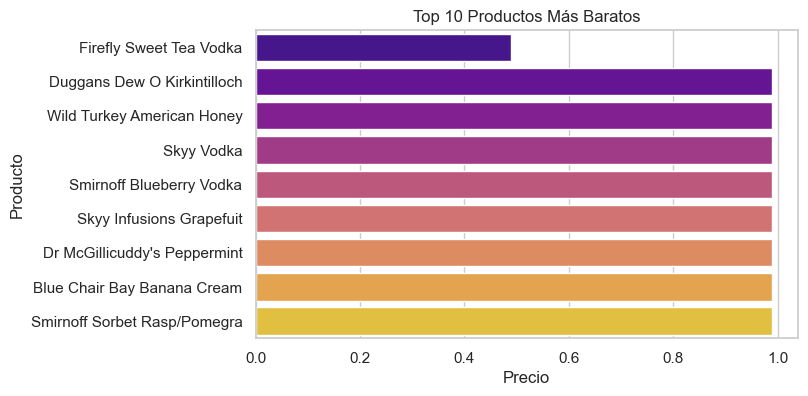

In [17]:
# Ordenar el DataFrame por precio de manera ascendente y seleccionar los 10 productos más baratos
cheapest_products = Inventario_Final[['Description', 'Price']].sort_values(by='Price', ascending=True).head(10)

# Graficar los productos más baratos
plt.figure(figsize=(7, 4))
sns.barplot(x=cheapest_products['Price'], y=cheapest_products['Description'], palette="plasma")
plt.title('Top 10 Productos Más Baratos')
plt.xlabel('Precio')
plt.ylabel('Producto')
plt.show()


Los productos más baratos suelen ser básicos, de alta rotación y con un enfoque en el volumen de ventas.Una pequeña variación en los precios sugiere una homogeneidad en los tipos de productos, probablemente pertenecientes a categorías de bajo coste.
Si los productos más baratos pertenecen a una categoría específica, indica una tendencia hacia el consumo de productos básicos y económicos.
Los productos en el top 10 por precio bajo son importantes para estrategias de marketing dirigidas a consumidores sensibles al precio y a la competencia de mercado.

##### FACTURAS COMPRAS 2016 #####

In [61]:
archivo = pd.read_csv('InvoicePurchases12312016.csv', sep=',')

In [62]:
archivo.head() #Visualiza los primeros datos para tener nocion de la estructura de los datos

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [63]:
archivo.shape # Verificamos que la cantidad de registros coincidan con los especificado

(5543, 10)

In [64]:
# Mostrar los tipos de datos originales
print("Tipos de datos originales:")
print(archivo.dtypes)

# Identificar y eliminar registros duplicados
print(f"\nTotal de registros antes de eliminar duplicados: {len(archivo)}")
archivo = archivo.drop_duplicates()
print(f"Total de registros después de eliminar duplicados: {len(archivo)}")

# Identificar y eliminar registros con valores nulos
print(f"\nTotal de registros antes de eliminar valores nulos: {len(archivo)}")
archivo = archivo.dropna()
print(f"Total de registros después de eliminar valores nulos: {len(archivo)}")

# Identificar y eliminar registros con valores vacíos (strings vacíos)
print(f"\nTotal de registros antes de eliminar valores vacíos: {len(archivo)}")
archivo = archivo[~(archivo == '').any(axis=1)]
print(f"Total de registros después de eliminar valores vacíos: {len(archivo)}")

Tipos de datos originales:
VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object

Total de registros antes de eliminar duplicados: 5543
Total de registros después de eliminar duplicados: 5543

Total de registros antes de eliminar valores nulos: 5543
Total de registros después de eliminar valores nulos: 374

Total de registros antes de eliminar valores vacíos: 374
Total de registros después de eliminar valores vacíos: 374


In [68]:
archivo['PayDate']=pd.to_datetime(archivo['PayDate'])

print(archivo['PayDate'].dtype)

datetime64[ns]


In [67]:
archivo['PODate']=pd.to_datetime(archivo['PODate'])

print(archivo['PODate'].dtype)

datetime64[ns]


In [71]:
start_date='2016-01-01'
end_date='2016-12-31'
archivo_reduced_fecha = archivo[(archivo['PODate']>= start_date) & (archivo['PODate']<=end_date)]
archivo_reduced_fecha.shape

(368, 10)

In [73]:
# Eliminar columnas menos relevantes
columns_to_drop = [ 'Approval']
archivo_reduced_fecha= archivo.drop(columns=columns_to_drop)

In [74]:
print(archivo_reduced_fecha.isnull().sum() [archivo_reduced_fecha.isnull().sum()>0])
print(np.shape(archivo_reduced_fecha))

Series([], dtype: int64)
(374, 9)


In [75]:
archivo_reduced_fecha.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight
93,480,BACARDI USA INC,2016-01-19,8288,2016-01-01,2016-02-18,32463,396606.13,1864.05
97,1128,BROWN-FORMAN CORP,2016-01-15,8210,2015-12-27,2016-02-25,23351,298902.89,1494.51
109,3960,DIAGEO NORTH AMERICA INC,2016-01-14,8271,2015-12-31,2016-02-11,100183,954454.16,4581.38
126,12546,JIM BEAM BRANDS COMPANY,2016-01-16,8241,2015-12-29,2016-02-15,56213,559691.95,2910.40
137,4425,MARTIGNETTI COMPANIES,2016-01-18,8276,2015-12-31,2016-02-28,42400,458222.53,2336.93


In [76]:
#Guardamos el dataset final con las filtraciones requeridas y limpio
archivo_reduced_fecha.to_csv('FacturasCompras.csv',index=False)

In [18]:
#Cargamos el archivo filtrado para continuar con el analisis
Facturas_Compras=pd.read_csv('FacturasCompras.csv', sep=',')

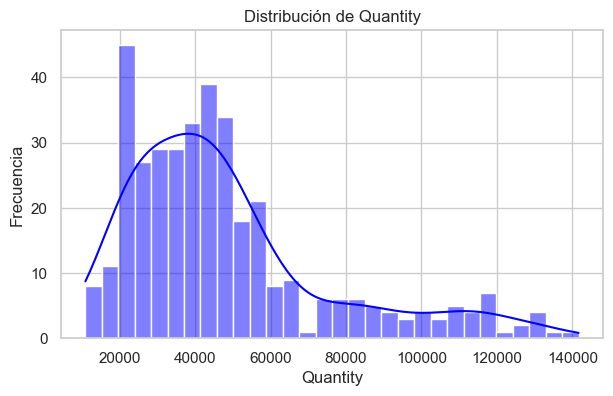

In [20]:
# Conversión de columnas de fecha a tipo datetime
Facturas_Compras['InvoiceDate'] = pd.to_datetime(Facturas_Compras['InvoiceDate'])

# Configuración de estilo
sns.set(style="whitegrid")

# Histograma de Quantity
plt.figure(figsize=(7, 4))
sns.histplot(Facturas_Compras['Quantity'], bins=30, kde=True, color='blue')
plt.title('Distribución de Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
plt.show()




Si la distribución es sesgada a la derecha, significa que la mayoría de las facturas son para cantidades menores, con algunas facturas de cantidades muy altas.
La mayor parte de las cantidades se concentran en un rango específico.
Outliers: Puede haber valores atípicos que representan cantidades significativamente mayores.

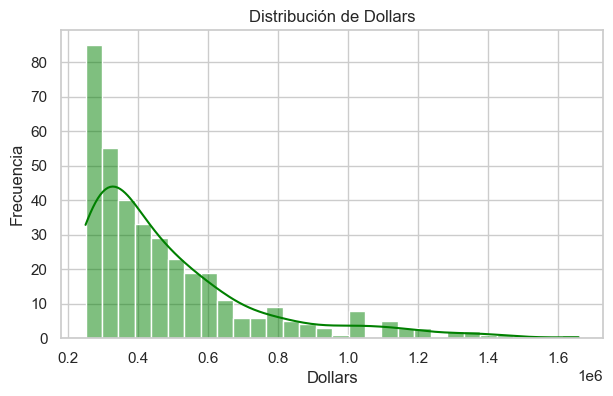

In [21]:
# Histograma de Dollars
plt.figure(figsize=(7, 4))
sns.histplot(Facturas_Compras['Dollars'], bins=30, kde=True, color='green')
plt.title('Distribución de Dollars')
plt.xlabel('Dollars')
plt.ylabel('Frecuencia')
plt.show()



La mayoría de las facturas son de montos bajos, con algunas facturas de montos significativamente altos, lo cual podría ser normal para una empresa con facturas grandes y pequeñas.

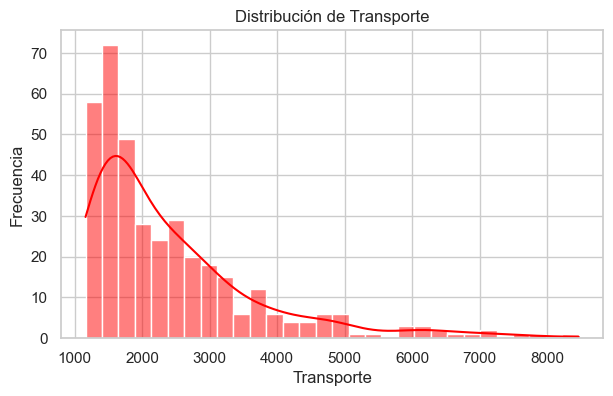

In [22]:
# Histograma de Trasnporte
plt.figure(figsize=(7, 4))
sns.histplot(Facturas_Compras['Freight'], bins=30, kde=True, color='red')
plt.title('Distribución de Transporte')
plt.xlabel('Transporte')
plt.ylabel('Frecuencia')
plt.show()



La mayoría de los costos de flete están en un rango específico, pero los valores atípicos indican que algunos envíos son significativamente más costosos

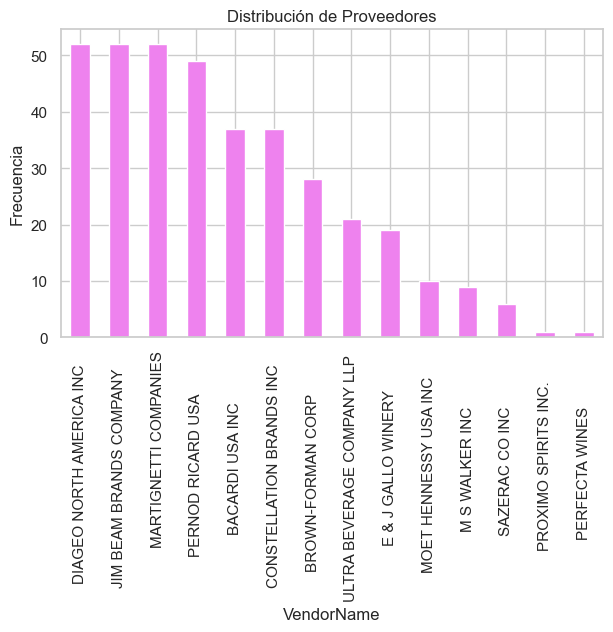

In [25]:
# Gráfico de barras de la distribución de proveedores
plt.figure(figsize=(7, 4))
Facturas_Compras['VendorName'].value_counts().plot(kind='bar', color='violet')
plt.title('Distribución de Proveedores')
plt.xlabel('VendorName')
plt.ylabel('Frecuencia')
plt.show()

Si unos pocos proveedores dominan la distribución, la empresa puede depender mucho de ellos. Una distribución más uniforme sugiere una diversificación de proveedores.